In [79]:
import numpy as np
import random

LAMB = 0.3

#exponential distribution cdf
def F(x):
    return 1 - np.exp(-x*LAMB) if x>= 0 else 0

In [80]:
def Finv(y):
    return np.log(1 - y)/(-LAMB)

In [81]:
X = Finv(np.random.rand(500))

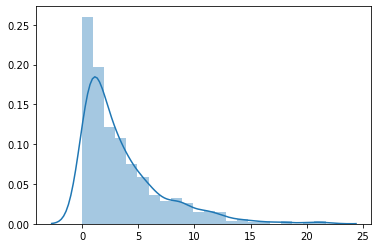

In [82]:
import seaborn as sns

sns.distplot(X)

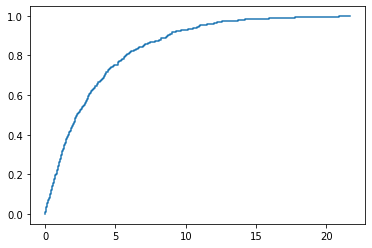

In [83]:
#Эмпирическая функция распределения
var_series_X = sorted(X)
def edf(z):
    t = 0
    for i in var_series_X:
        if i < z:
            t += 1
    return t/len(var_series_X)

edf_X = np.array([edf(el) for el in X])
sns.lineplot(X,edf_X, drawstyle='steps-pre')

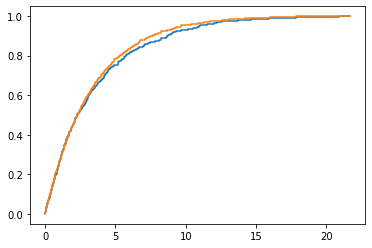

In [84]:
cdf_X = expon.cdf(X, scale = 1/LAMB)
sns.lineplot(X,edf_X, drawstyle='steps-pre')
sns.lineplot(X,cdf_X, drawstyle='steps-pre')

In [85]:
from scipy.stats import kstest, norm, expon

kstest(X, 'expon', args = (0,1/LAMB))

KstestResult(statistic=0.037523118042085635, pvalue=0.4772703630093232)

In [86]:
kstest(X, 'norm')

KstestResult(statistic=0.5943132321789648, pvalue=4.9811375844727056e-169)

In [102]:
sizes = np.linspace(50, 20000, 50)
p_values = []
statistics = []

for size in sizes:
    X = Finv(np.random.rand(int(size)))
    statistic, p_val = kstest(X, 'expon', args = (0,1/LAMB))
    p_values.append(p_val)
    statistics.append(statistic)

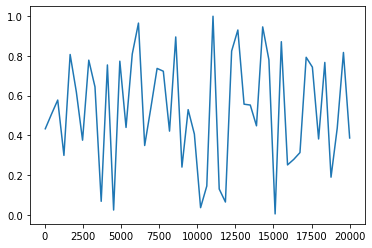

In [103]:
sns.lineplot(sizes,p_values)

In [104]:
min(p_values)

0.006067646390599773

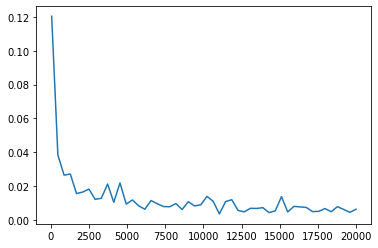

In [105]:
sns.lineplot(sizes, statistics)

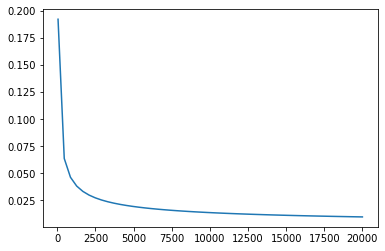

In [106]:
alpha = 0.05
epss = [ np.sqrt(np.log(2/alpha)/(2*n)) for n in sizes]
sns.lineplot(sizes, epss)